In [17]:
"""
"""
import logging

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

from qpmr import qpmr, distribution_diagram
from qpmr.qpmr_v2 import find_roots, create_vector_callable
from qpmr.quasipoly import QuasiPolynomial


_ = logging.getLogger("matplotlib").setLevel(logging.ERROR)
_ = logging.getLogger("PIL").setLevel(logging.ERROR)
logger = logging.getLogger("qpmr")

if __name__ == "__main__":
    logging.basicConfig(level=logging.DEBUG)
    
    region = [-2, 7, 0, 9]
    delays = np.array([0.0, 1.3, 3.5, 4.3])
    coefs = np.array([[20.1, 0, 0.2, 1.5],
                      [0, -2.1, 0, 1],
                      [0, 3.2, 0, 0],
                      [1.4, 0, 0, 0]])
    
    matlab_roots = np.array([-1.3134 + 0.0000j,
                            -0.4091 + 1.5397j,
                            -1.6802 + 0.0000j,
                            1.1363 + 2.2206j,
                            -0.6429 + 3.1243j,
                            -1.0866 + 5.4556j,
                            -0.2143 + 7.2156j,
                            -1.4891 + 8.4415j,
                            -3.9318 + 9.3232j,
                            -1.6677 +11.2869j,
                            -0.3018 +12.1177j,
                            -1.8893 +14.1579j,
                            -0.3217 +16.9128j,
                            -2.0672 +17.0048j,
                            -4.6409 +17.3486j,
                            -2.2049 +19.9195j,
                            -0.3009 +21.7462j,
                            -2.2803 +22.7487j,
                            -2.4767 +25.6000j,
                            -5.0925 +25.2751j,
                            -0.3070 +26.5922j,
                            -2.5032 +28.5239j,
                            -2.5777 +31.2876j,
                            -0.3152 +31.4191j,
                            -5.4285 +33.1742j,
                            -2.7411 +34.2292j,
                            -0.3093 +36.2482j,
                            -2.7058 +37.0844j,
                            -2.8489 +39.8584j,
                            -0.3088 +41.0865j,
                            -5.6913 +41.0624j,
                            -2.9079 +42.8371j,
                            -2.8930 +45.6153j,
                            -0.3132 +45.9189j,
                            -3.0587 +48.4707j,
                            -5.9046 +48.9392j,])

    roots, meta = qpmr(region, coefs, delays, ds=0.079)

DEBUG:qpmr.qpmr_v2:Estimated size of complex grid = 230400.0 bytes
DEBUG:qpmr.numerical_methods:Numerical Newton converged in 3/100 steps, last MAX(|res|) = 6.854352951786018e-09
DEBUG:qpmr.argument_principle:Enlarging region from region=[-2, 7, 0, 9] to reg=[-2.0079, 7.0079, -0.0079, 9.0079]
DEBUG:qpmr.argument_principle:Using argument principle, contour integral = 8.022614183250507 | rounded to 8.0
DEBUG:qpmr.argument_principle:Enlarging region from region=[-1.9921, 6.9921, 0.0079, 8.9921] to reg=[-2.0, 7.0, 0.0, 9.0]
DEBUG:qpmr.argument_principle:Using argument principle, contour integral = 7.023127676301699 | rounded to 7.0


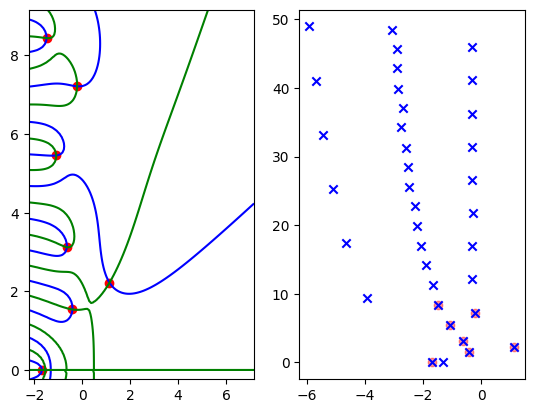

In [18]:
complex_grid = meta.complex_grid
value = meta.z_value
h = create_vector_callable(coefs, delays)


plt.figure()

plt.subplot(121)
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.real(value), levels=[0], colors='blue')
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.imag(value), levels=[0], colors='green')
plt.scatter(np.real(roots), np.imag(roots), marker="o", color="r")

plt.subplot(122)
plt.scatter(np.real(roots), np.imag(roots), marker="o", color="r", alpha=0.4)
plt.scatter(np.real(matlab_roots), np.imag(matlab_roots), marker="x", color="b")

In [19]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

In [20]:
contour = meta.contours_real[6]
val = np.imag(h(contour[:,0] + 1j*contour[:,1]))
imag = np.sign(val)
s = np.abs(np.diff(np.sign(val))).astype(bool)

duplicates = s[:-1] & s[1:] # duplicates mask
#s[1:] = np.bitwise_xor(s[1:], duplicates) # removes duplicates

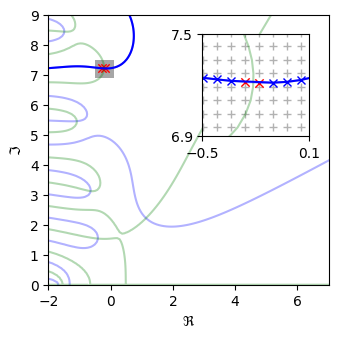

In [21]:
# rectangle definition
x, y = -0.5, 6.9
dx, dy = 0.6, 0.6

fig, ax = plt.subplots(1,1, figsize=(251/72, 251/72))

ax.add_patch(Rectangle((x, y), dx, dy, facecolor="grey", alpha=0.7))

ax.contour(np.real(complex_grid), np.imag(complex_grid), np.real(value), levels=[0], colors='blue', alpha=0.3)
ax.contour(np.real(complex_grid), np.imag(complex_grid), np.imag(value), levels=[0], colors='green', alpha=0.3)
ax.plot(contour[:,0], contour[:,1], color="blue")
ax.scatter(contour[1:,0][s], contour[1:,1][s], marker="x", color="r",linewidths=1)
ax.scatter(contour[:-1,0][s], contour[:-1,1][s], marker="x", color="r",linewidths=1)
ax.set_xlabel(f'$\Re$')
ax.set_ylabel(f'$\Im$')
ax.set_xlim(region[0], region[1])
ax.set_ylim(region[2], region[3])

ins_ax = ax.inset_axes([0.55,0.55,0.38,0.38])
grid_x = np.real(np.ravel(meta.complex_grid))
grid_y = np.imag(np.ravel(meta.complex_grid))

ins_ax.scatter(grid_x, grid_y, marker="+", color="k", alpha=0.3, linewidths=1)
ins_ax.contour(np.real(complex_grid), np.imag(complex_grid), np.real(value), levels=[0], colors='blue', alpha=0.3)
ins_ax.contour(np.real(complex_grid), np.imag(complex_grid), np.imag(value), levels=[0], colors='green', alpha=0.3)
ins_ax.plot(contour[1:-1,0][~(s[:-1]|s[1:])], contour[1:-1,1][~(s[:-1]|s[1:])], "-x", color="blue")
ins_ax.scatter(contour[1:,0][s], contour[1:,1][s], marker="x", color="r", linewidths=1)
ins_ax.scatter(contour[:-1,0][s], contour[:-1,1][s], marker="x", color="r", linewidths=1)
ins_ax.set_ylim(y, y+dy)
ins_ax.set_xlim((x, x+dx))
ins_ax.set_xticks([x, x+dx])
ins_ax.set_yticks([y, y+dy])
plt.tight_layout()

#plt.savefig('contour.pdf', format='pdf')

array([-0.3, -0.3, -0.3, ..., 10.3, 10.3, 10.3])